<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/20_lmplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn: lmplot

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('penguins').dropna()

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Basics

In [ ]:
sns.set_style('white')

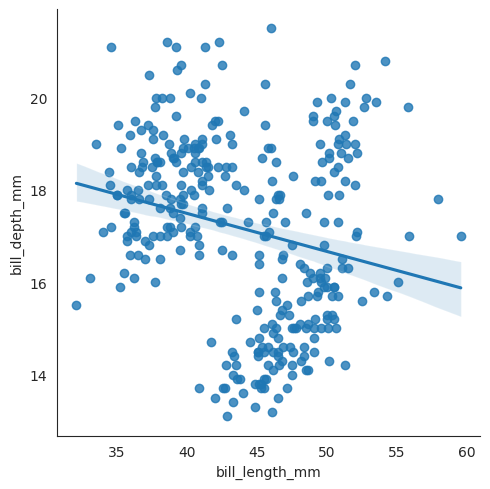

In [ ]:
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=df);

### `hue`

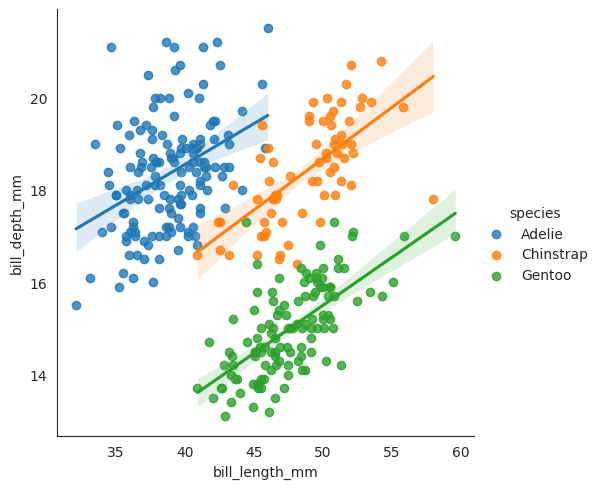

In [ ]:
sns.lmplot(x='bill_length_mm', y='bill_depth_mm',
           hue='species',
           data=df
          );

### `markers`

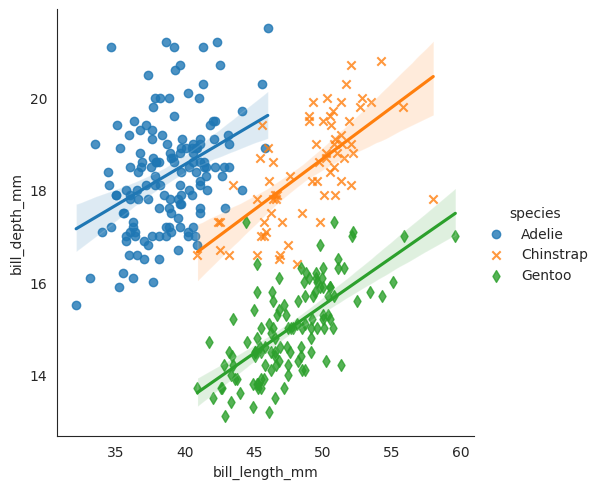

In [ ]:
sns.lmplot(x='bill_length_mm', y='bill_depth_mm',
           hue='species',
           markers=['o', 'x', 'd'],
           data=df
          );

## Small Multiples (FacetGrid)

### `col`

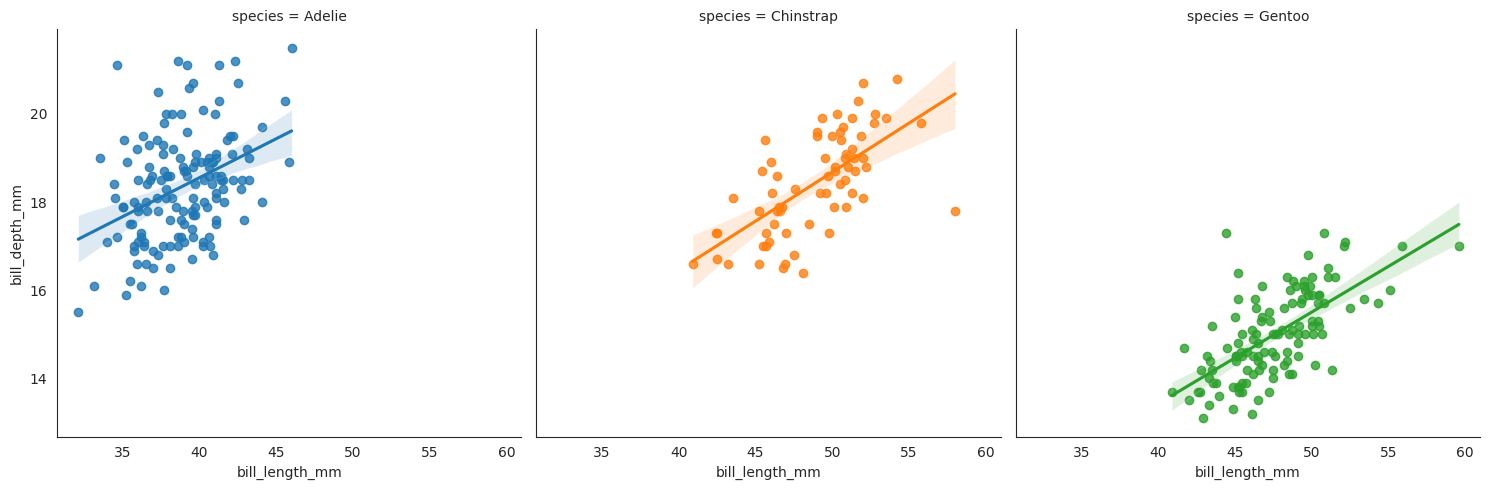

In [ ]:
sns.lmplot(x='bill_length_mm', y='bill_depth_mm',
           hue='species',
           col='species',
           data=df
          );

### `row`

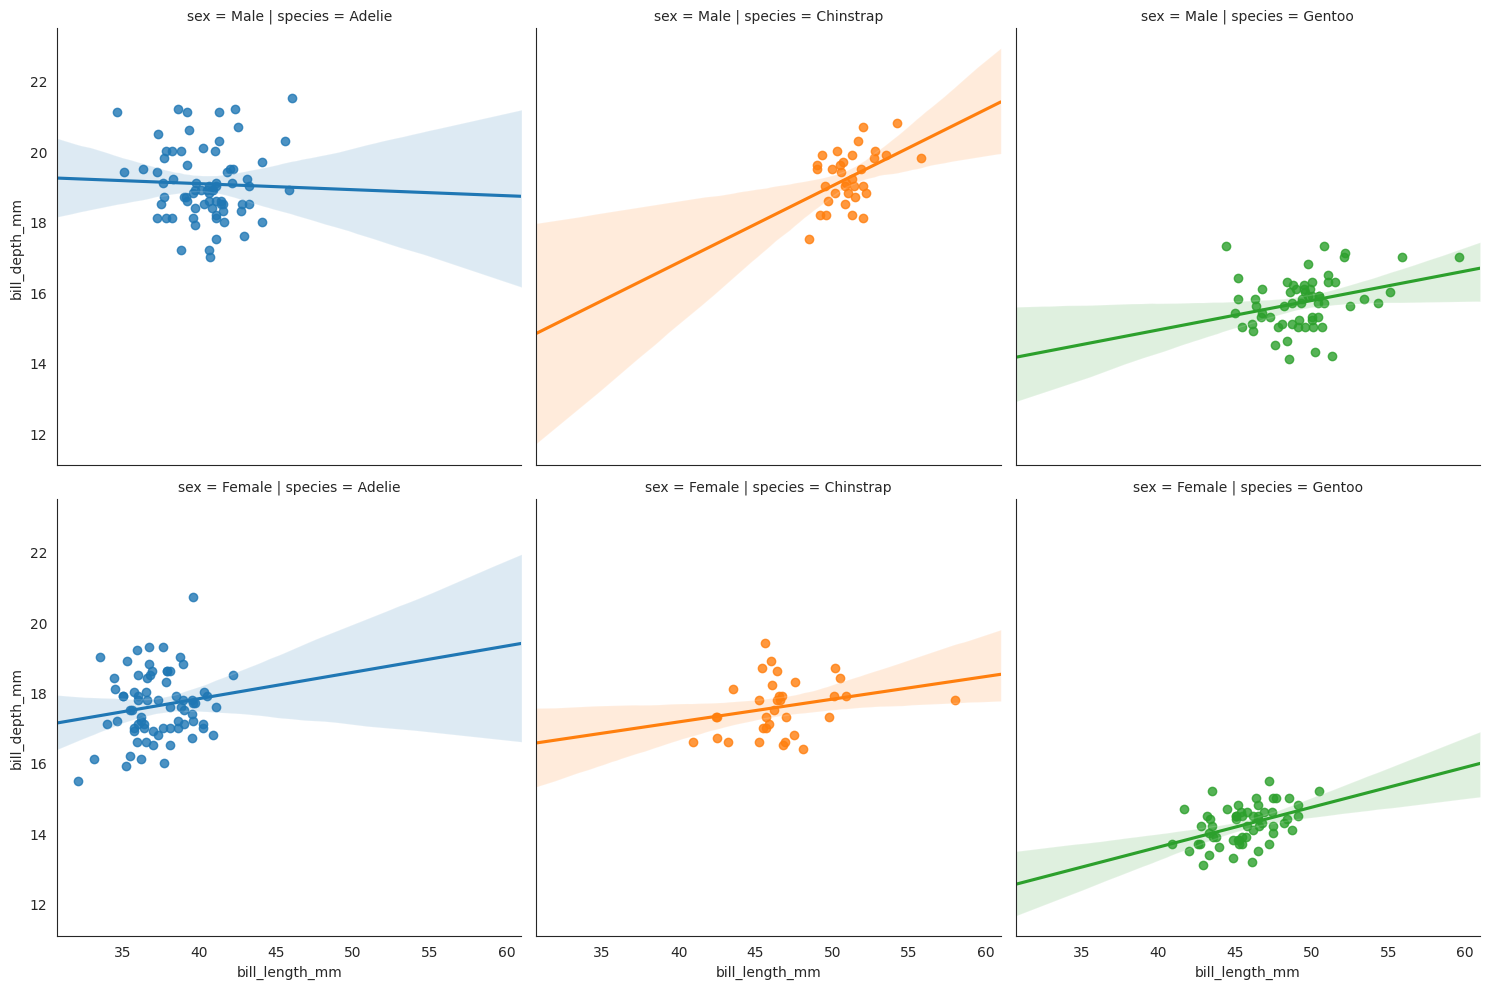

In [ ]:
sns.lmplot(x='bill_length_mm', y='bill_depth_mm',
           hue='species',
           col='species',
           row='sex',
           truncate=False,
           data=df
          );

## Extras

### `x_bins`

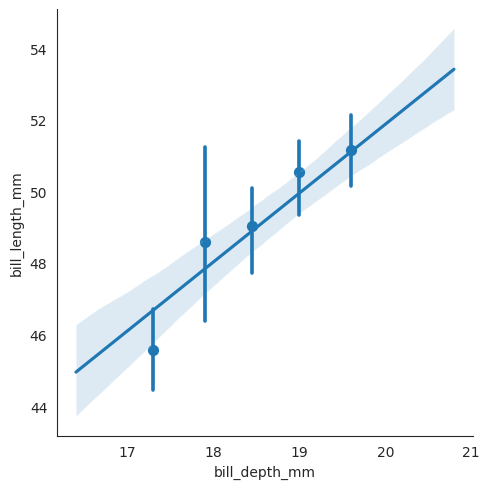

In [ ]:
sns.lmplot(x='bill_depth_mm', y='bill_length_mm',
           data=df[df.species=='Chinstrap'],
           x_bins=5
           );

### Other models: Logistic Regression, `logistic`

In [ ]:
df['sex_binary'] = [(x == 'Male') for x in df.sex]

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_binary
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True


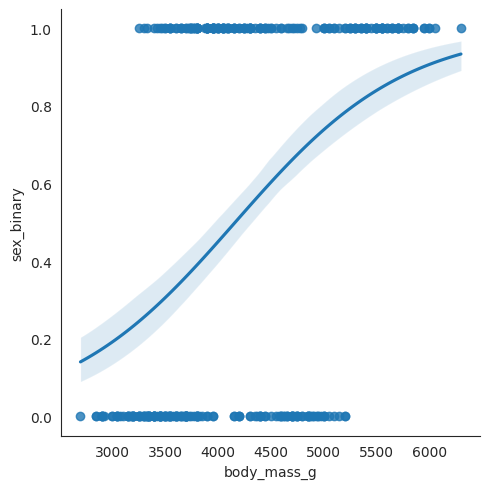

In [ ]:
sns.lmplot(x='body_mass_g', y='sex_binary', data=df, logistic=True, n_boot=100);

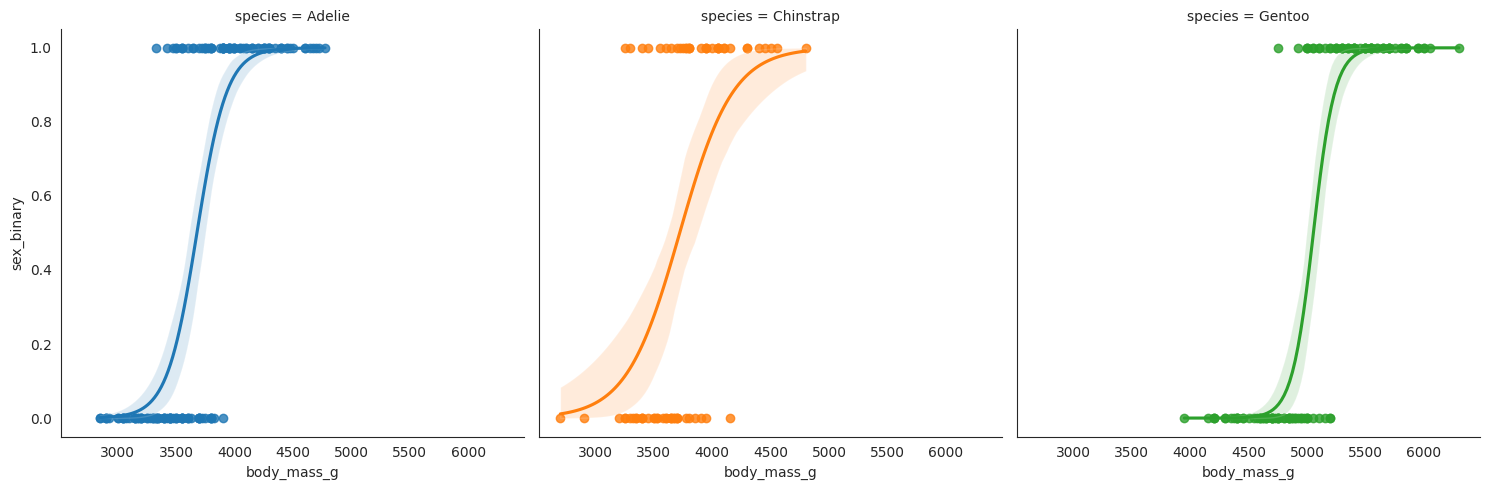

In [ ]:
sns.lmplot(x='body_mass_g', y='sex_binary', data=df, logistic=True, n_boot=100,
          hue='species', col='species');

## Styling

### `scatter_kws`

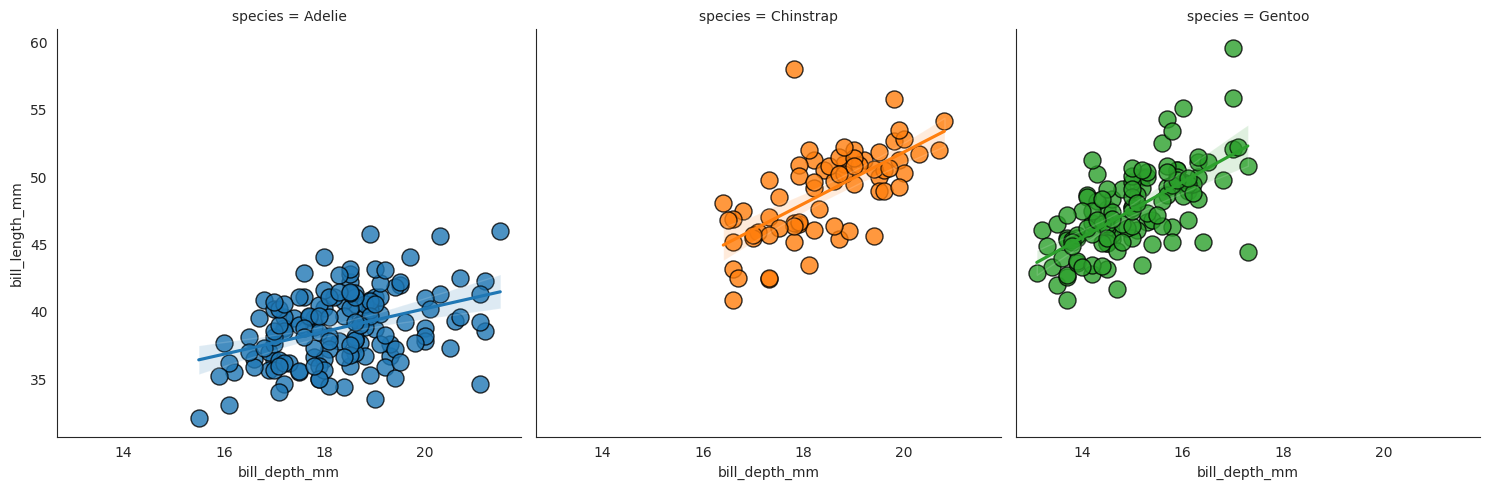

In [ ]:
sns.lmplot(x='bill_depth_mm', y='bill_length_mm',
           data=df,
           hue='species',
           col='species',
           scatter_kws={'s': 150, 'edgecolor': 'black'}
           );

### `line_kws`

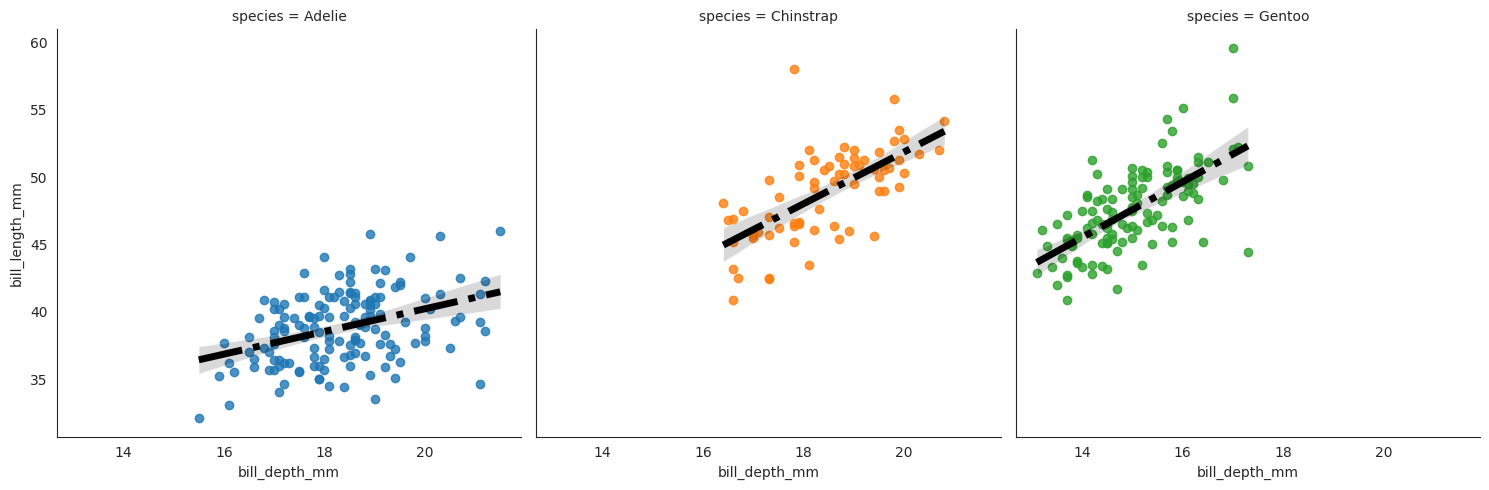

In [ ]:
sns.lmplot(x='bill_depth_mm', y='bill_length_mm',
           data=df,
           hue='species',
           col='species',
           line_kws={'lw': 5, 'ls': '-.', 'color': 'black'}
           );

### FacetGrid Object

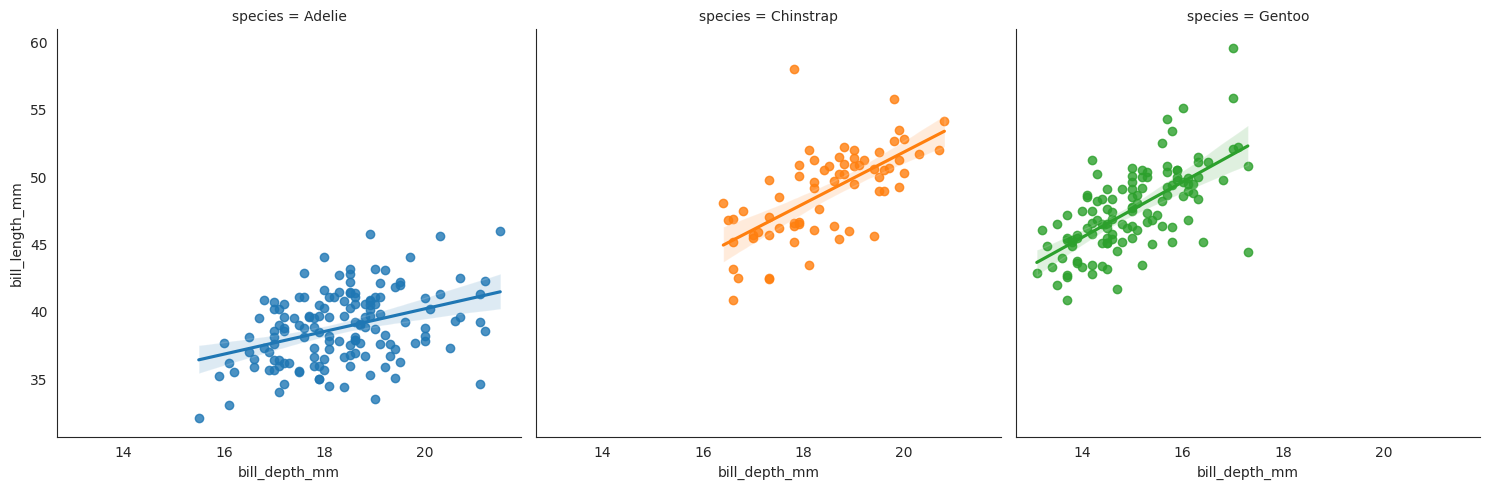

In [ ]:
g = sns.lmplot(x='bill_depth_mm', y='bill_length_mm',
               data=df,
               hue='species',
               col='species'
              );

In [ ]:
type(g)

seaborn.axisgrid.FacetGrid

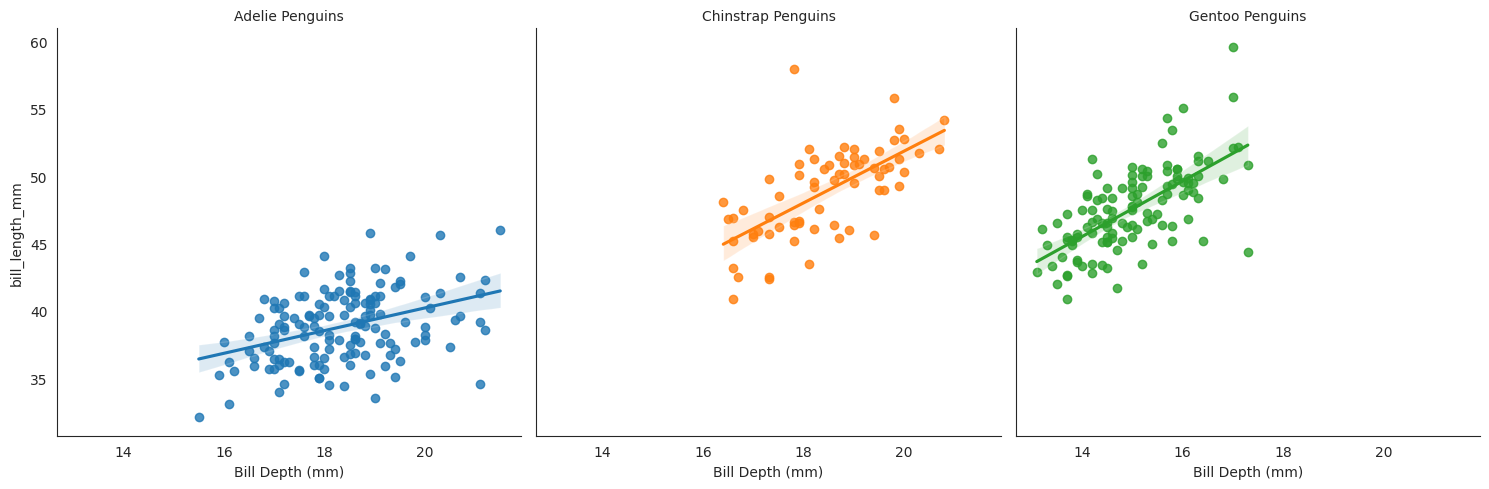

In [ ]:
g = sns.lmplot(x='bill_depth_mm', y='bill_length_mm',
               data=df,
               hue='species',
               col='species'
              )

g.set_titles(col_template='{col_name} Penguins')
g.set_xlabels('Bill Depth (mm)');

## Examples, Thumbnail

In [ ]:
from matplotlib import pyplot as plt

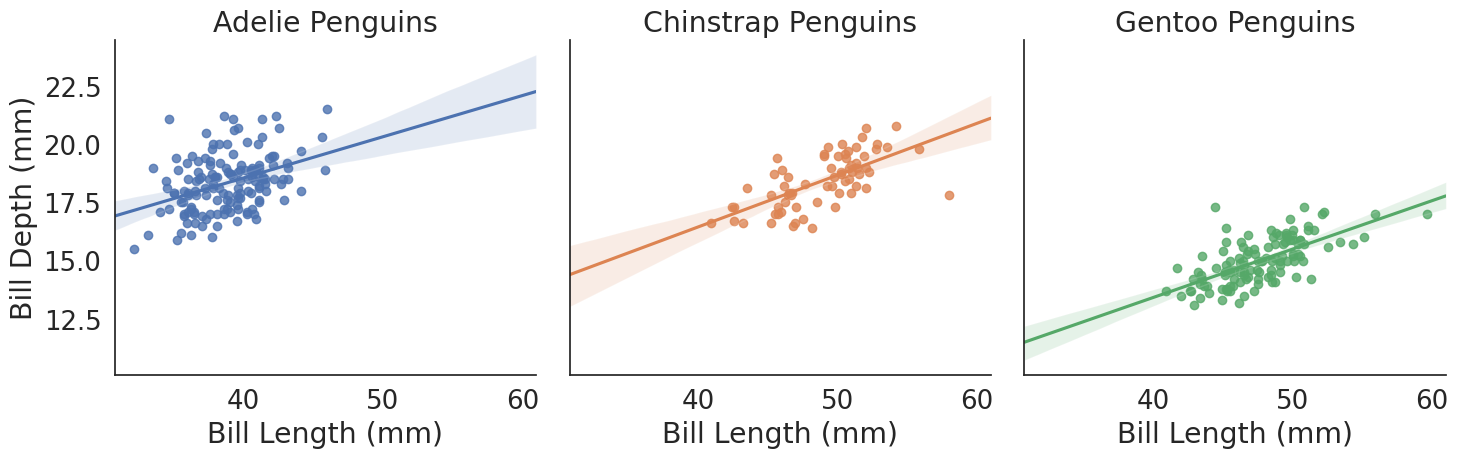

In [ ]:
sns.set(style='white', font_scale=1.7)
g = sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species', col='species', truncate=False)

g.set_titles('{col_name} Penguins')
g.set_xlabels('Bill Length (mm)')
g.set_ylabels('Bill Depth (mm)')
plt.tight_layout()
#plt.savefig('20lmplot_image_facetGridExample.png', dpi=200);

In [ ]:
diamonds = sns.load_dataset('diamonds').sample(1000)

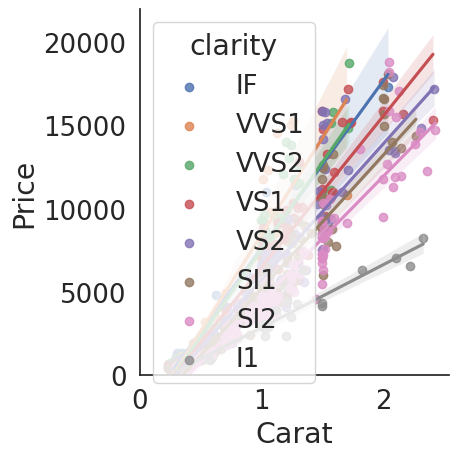

In [ ]:
sns.lmplot(x='carat', y='price', data=diamonds, hue='clarity', legend=False)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.ylim(0, None)
plt.xlim(0, None)
plt.legend(loc=2, title='clarity')
plt.tight_layout()
#plt.savefig('20lmplot_image_tooManyLines.png', dpi=200);

(0.0, 22063.296494548755)

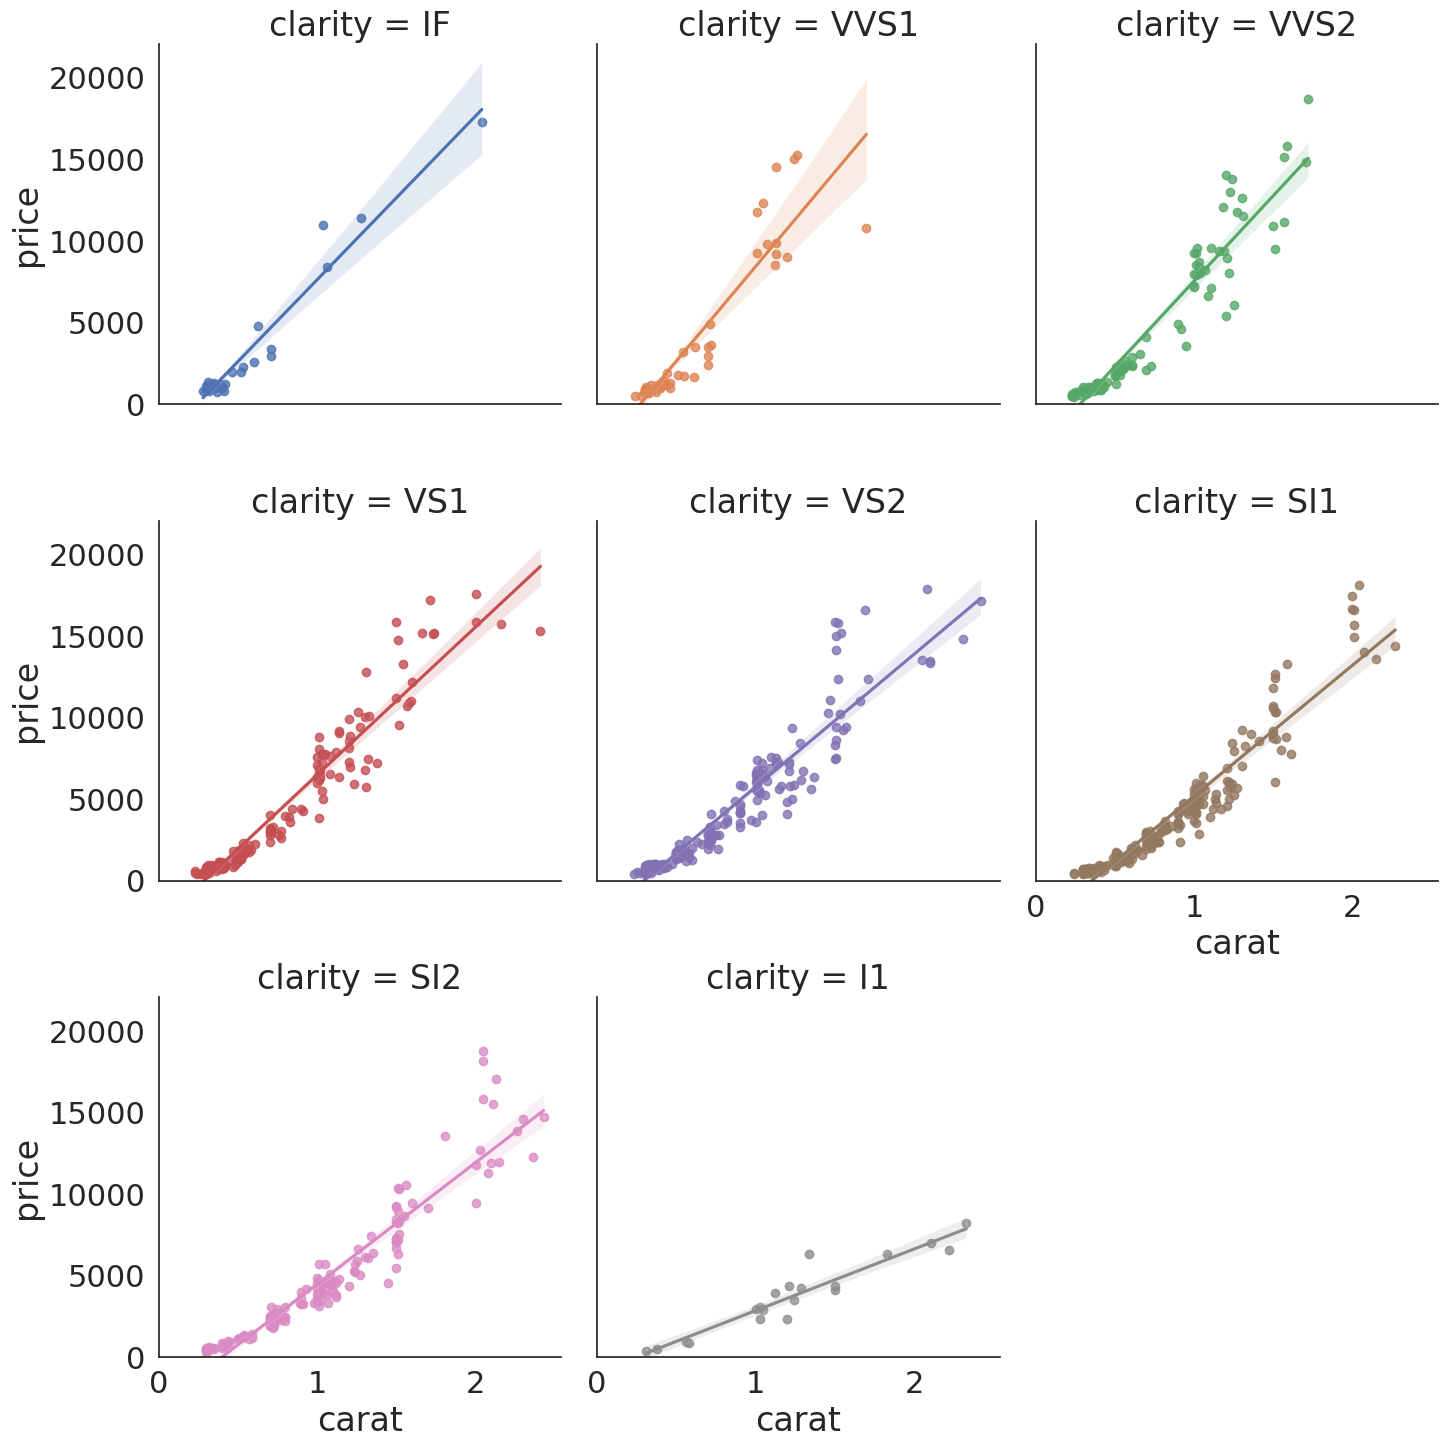

In [ ]:
sns.set(style='white', font_scale=2)
sns.lmplot(x='carat', y='price', hue='clarity', data=diamonds, col='clarity', col_wrap=3)
plt.xlim(0, None)
plt.ylim(0, None)
#plt.savefig('20lmplot_image_tooManyLinesFacet.png', dpi=200);

### Thumb

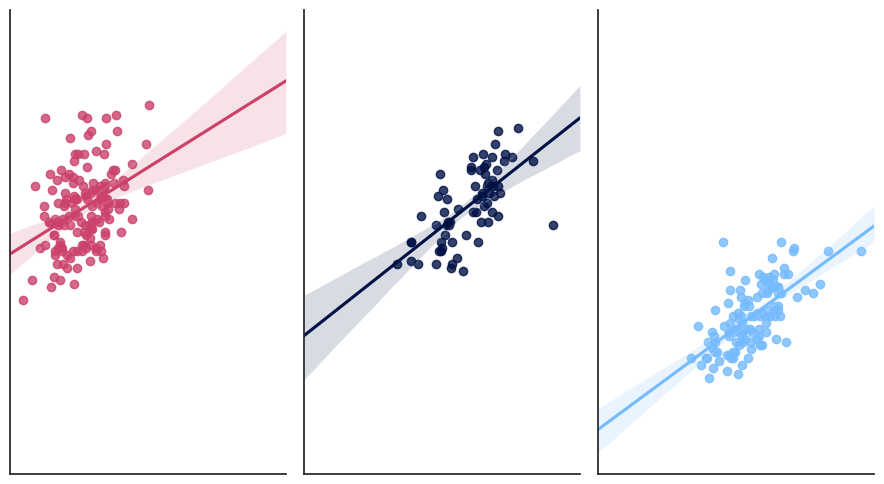

In [ ]:
sns.set(style='white', font_scale=1)
g = sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=df,
               hue='species', col='species', truncate=False, aspect=.6,
               palette=['#cb416b','#001146', '#75bbfd']
              )

g.set_titles('')
g.set_xlabels('')
g.set_ylabels('')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
#plt.savefig('20lmplot_image_thumb.png', dpi=200);